## Import Libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure

### Importing Dataset

In [55]:
df=pd.read_pickle(os.path.join(r"C:\Users\aminj\Documents\DataSets\Weather Conditions & Climate Change\Data\weather-data.pkl"))

In [56]:
pleasantdf=pd.read_csv(os.path.join(r"C:\Users\aminj\Documents\DataSets\Weather Conditions & Climate Change\Data\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv"))

### Data Manipulation

In [58]:
df.head()

,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE,MONTH
0,-1.731975,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,19600101,1
1,-1.731824,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,19600102,1
2,-1.731673,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,19600103,1
3,-1.731523,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,...,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511,19600104,1
4,-1.731372,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,...,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186,19600105,1


In [59]:
#dropping unrelated station data from main dataset
activedf=df.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max','ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean','TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [60]:
df.head()

,id,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE,MONTH
0,-1.731975,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,19600101,1
1,-1.731824,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,19600102,1
2,-1.731673,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,19600103,1
3,-1.731523,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,-0.555784,...,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511,19600104,1
4,-1.731372,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,-1.003946,...,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186,19600105,1


In [76]:
#Create an 'X' and y df by dropping the unneeded columns.
X = activedf.drop(['DATE', 'MONTH'], axis=1)
y = pleasantdf.drop(['DATE'],axis=1)

In [62]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [63]:
#viewing shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 148)
(5738, 148)
(17212, 15)
(5738, 15)


In [64]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [65]:
#converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

### Decisiion Trees, ANN

[Text(0.3697026914404038, 0.9827586206896551, 'x[50] <= 0.403\ngini = 0.314\nsamples = 17212\nvalue = [[12978, 4234]\n[11216, 5996]\n[11633, 5579]\n[13890, 3322]\n[13531, 3681]\n[13498, 3714]\n[14436, 2776]\n[12426, 4786]\n[13646, 3566]\n[9516, 7696]\n[13642, 3570]\n[14566, 2646]\n[17212, 0]\n[14295, 2917]\n[16349, 863]]'),
 Text(0.0654073167026877, 0.9482758620689655, 'x[99] <= -0.216\ngini = 0.099\nsamples = 10782\nvalue = [[10123.0, 659.0]\n[9060.0, 1722.0]\n[9508.0, 1274.0]\n[10694.0, 88.0]\n[10782.0, 0.0]\n[10156.0, 626.0]\n[10703.0, 79.0]\n[9831.0, 951.0]\n[10709.0, 73.0]\n[8020.0, 2762.0]\n[10373.0, 409.0]\n[10535.0, 247.0]\n[10782.0, 0.0]\n[10531.0, 251.0]\n[10618.0, 164.0]]'),
 Text(0.018733471940465346, 0.9137931034482759, 'x[20] <= 0.053\ngini = 0.028\nsamples = 7547\nvalue = [[7428.0, 119.0]\n[6863.0, 684.0]\n[7197.0, 350.0]\n[7535.0, 12.0]\n[7547.0, 0.0]\n[7504.0, 43.0]\n[7525.0, 22.0]\n[7332.0, 215.0]\n[7523.0, 24.0]\n[7547.0, 0.0]\n[7398.0, 149.0]\n[7517.0, 30.0]\n[7547.

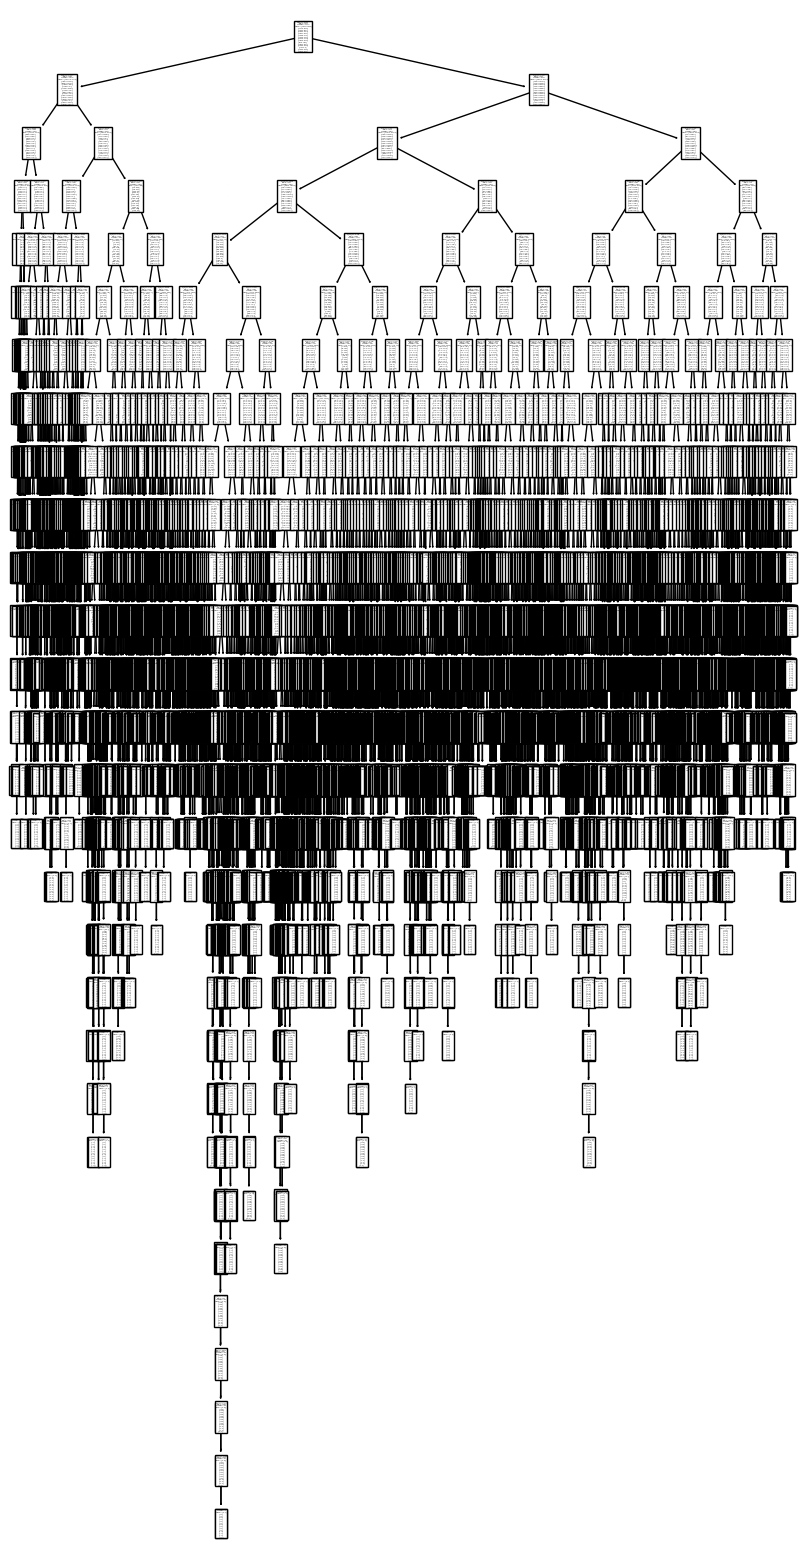

In [67]:
#Run Decision Tree classifier
activedt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
activedt.fit(X_train, y_train)
figure(figsize=(10,20))
tree.plot_tree(activedt)

In [68]:
#cross validation method
y_pred_train = activedt.predict(X_train)
print('Train accuracy score: ',cross_val_score(activedt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6081799113656248


In [69]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4234
           1       1.00      1.00      1.00      5996
           2       1.00      1.00      1.00      5579
           3       1.00      1.00      1.00      3322
           4       1.00      1.00      1.00      3681
           5       1.00      1.00      1.00      3714
           6       1.00      1.00      1.00      2776
           7       1.00      1.00      1.00      4786
           8       1.00      1.00      1.00      3566
           9       1.00      1.00      1.00      7696
          10       1.00      1.00      1.00      3570
          11       1.00      1.00      1.00      2646
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2917
          14       1.00      1.00      1.00       863

   micro avg       1.00      1.00      1.00     55346
   macro avg       0.93      0.93      0.93     55346
weighted avg       1.00   

C:\Users\aminj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aminj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aminj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aminj\anaconda3\Lib\site-package

In [70]:
locations = list({x.split("_")[0] for x in activedf.columns if x not in ["MONTH", "DATE"]})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA', 'id']


C:\Users\aminj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


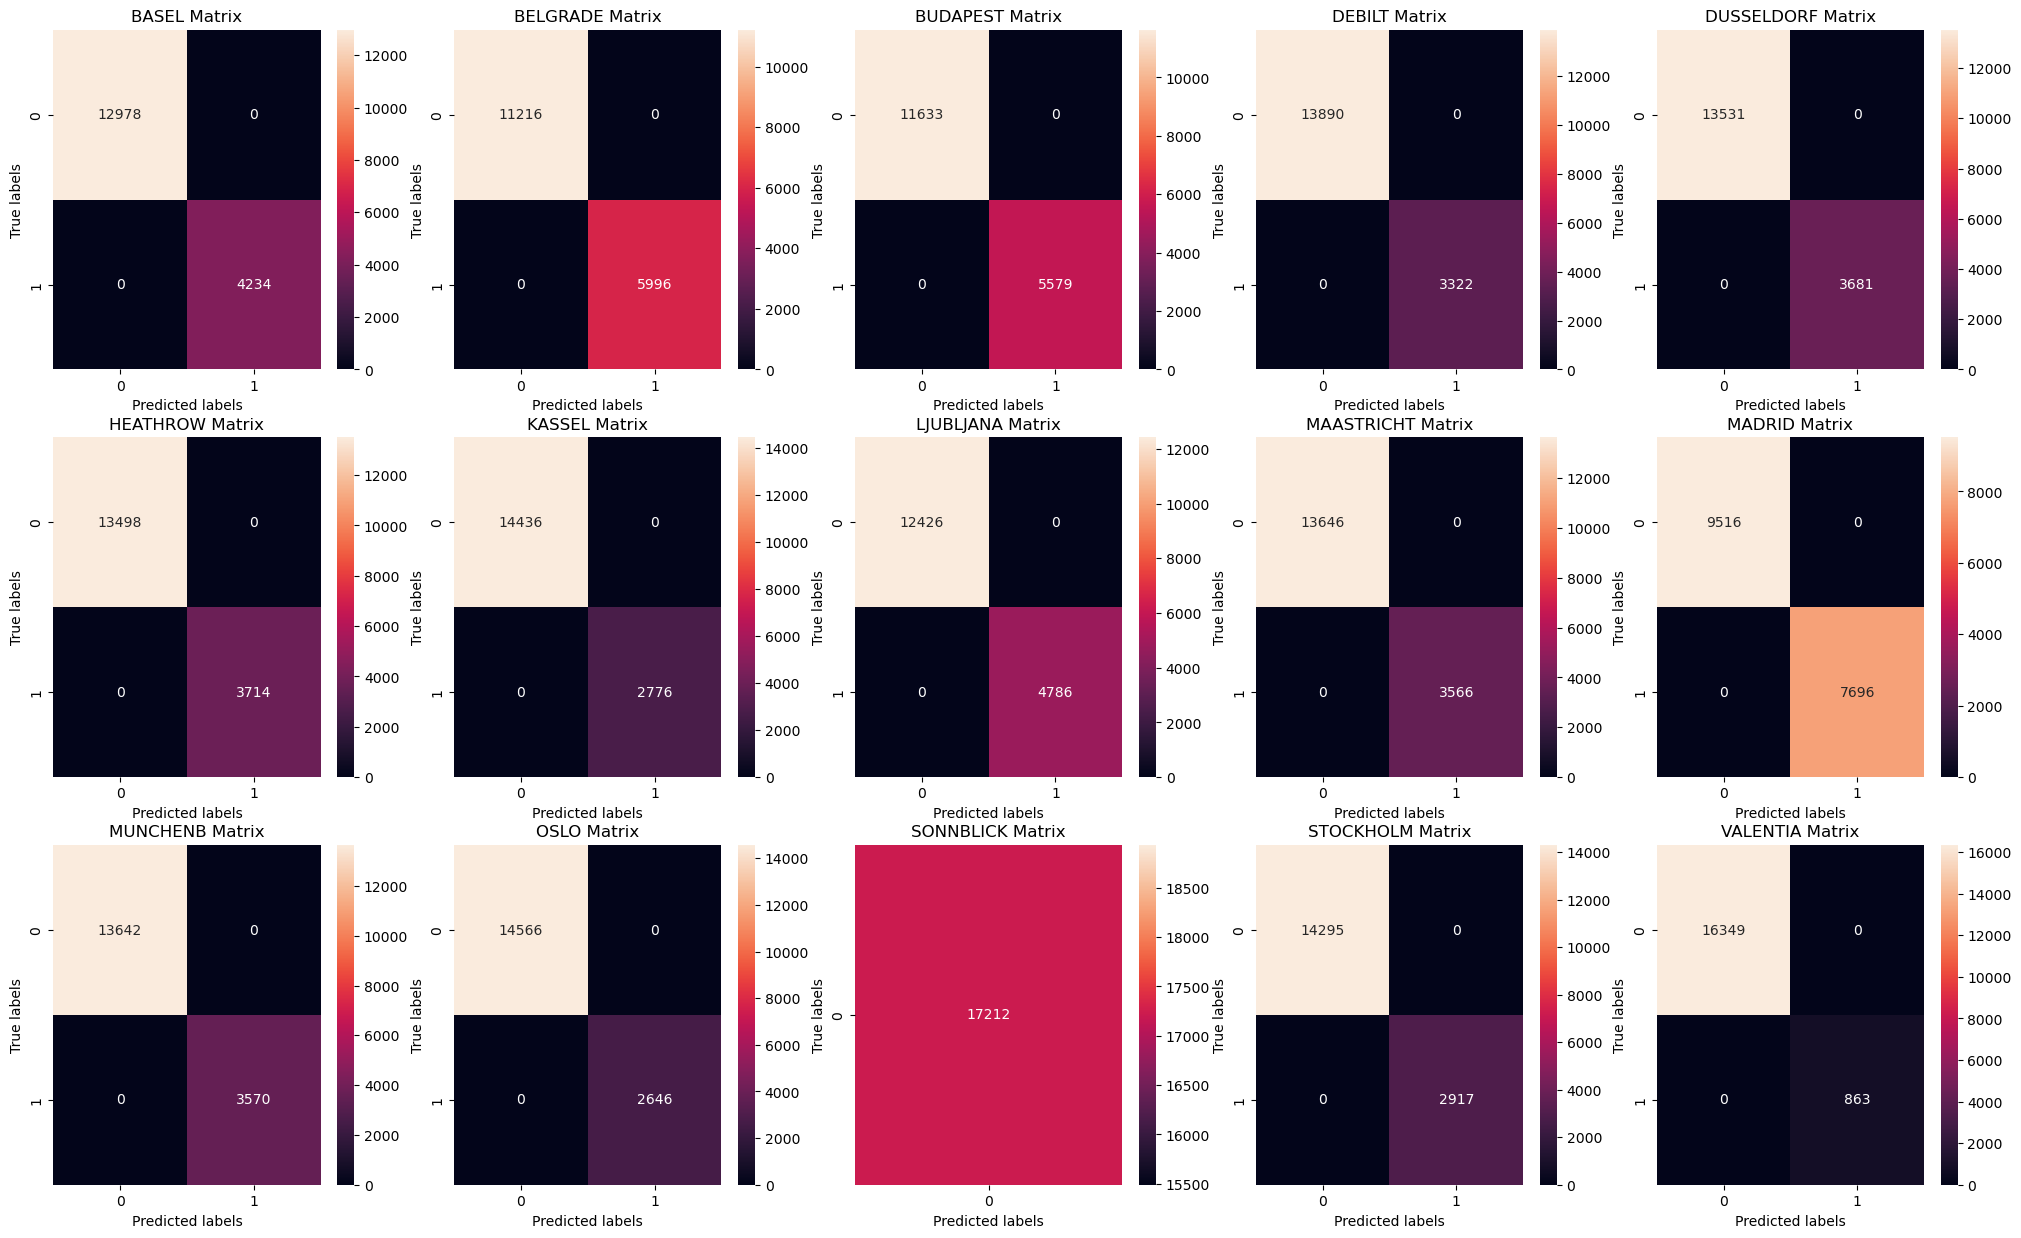

In [80]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [92]:
y_test_pred = activedt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred))
multilabel_confusion_matrix(y_test, y_test_pred)

Test accuracy score:  0.6352387591495294


array([[[4186,  122],
        [ 119, 1311]],

       [[3610,  132],
        [ 114, 1882]],

       [[3760,  126],
        [ 103, 1749]],

       [[4392,  209],
        [ 211,  926]],

       [[4444,   41],
        [  38, 1215]],

       [[4223,  270],
        [ 273,  972]],

       [[4583,  157],
        [ 171,  827]],

       [[4089,   59],
        [  53, 1537]],

       [[4327,  211],
        [ 153, 1047]],

       [[3005,  182],
        [ 137, 2414]],

       [[4379,  162],
        [ 137, 1060]],

       [[4699,  106],
        [ 145,  788]],

       [[5738,    0],
        [   0,    0]],

       [[4520,  241],
        [ 206,  771]],

       [[5243,  184],
        [ 196,  115]]], dtype=int64)

C:\Users\aminj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


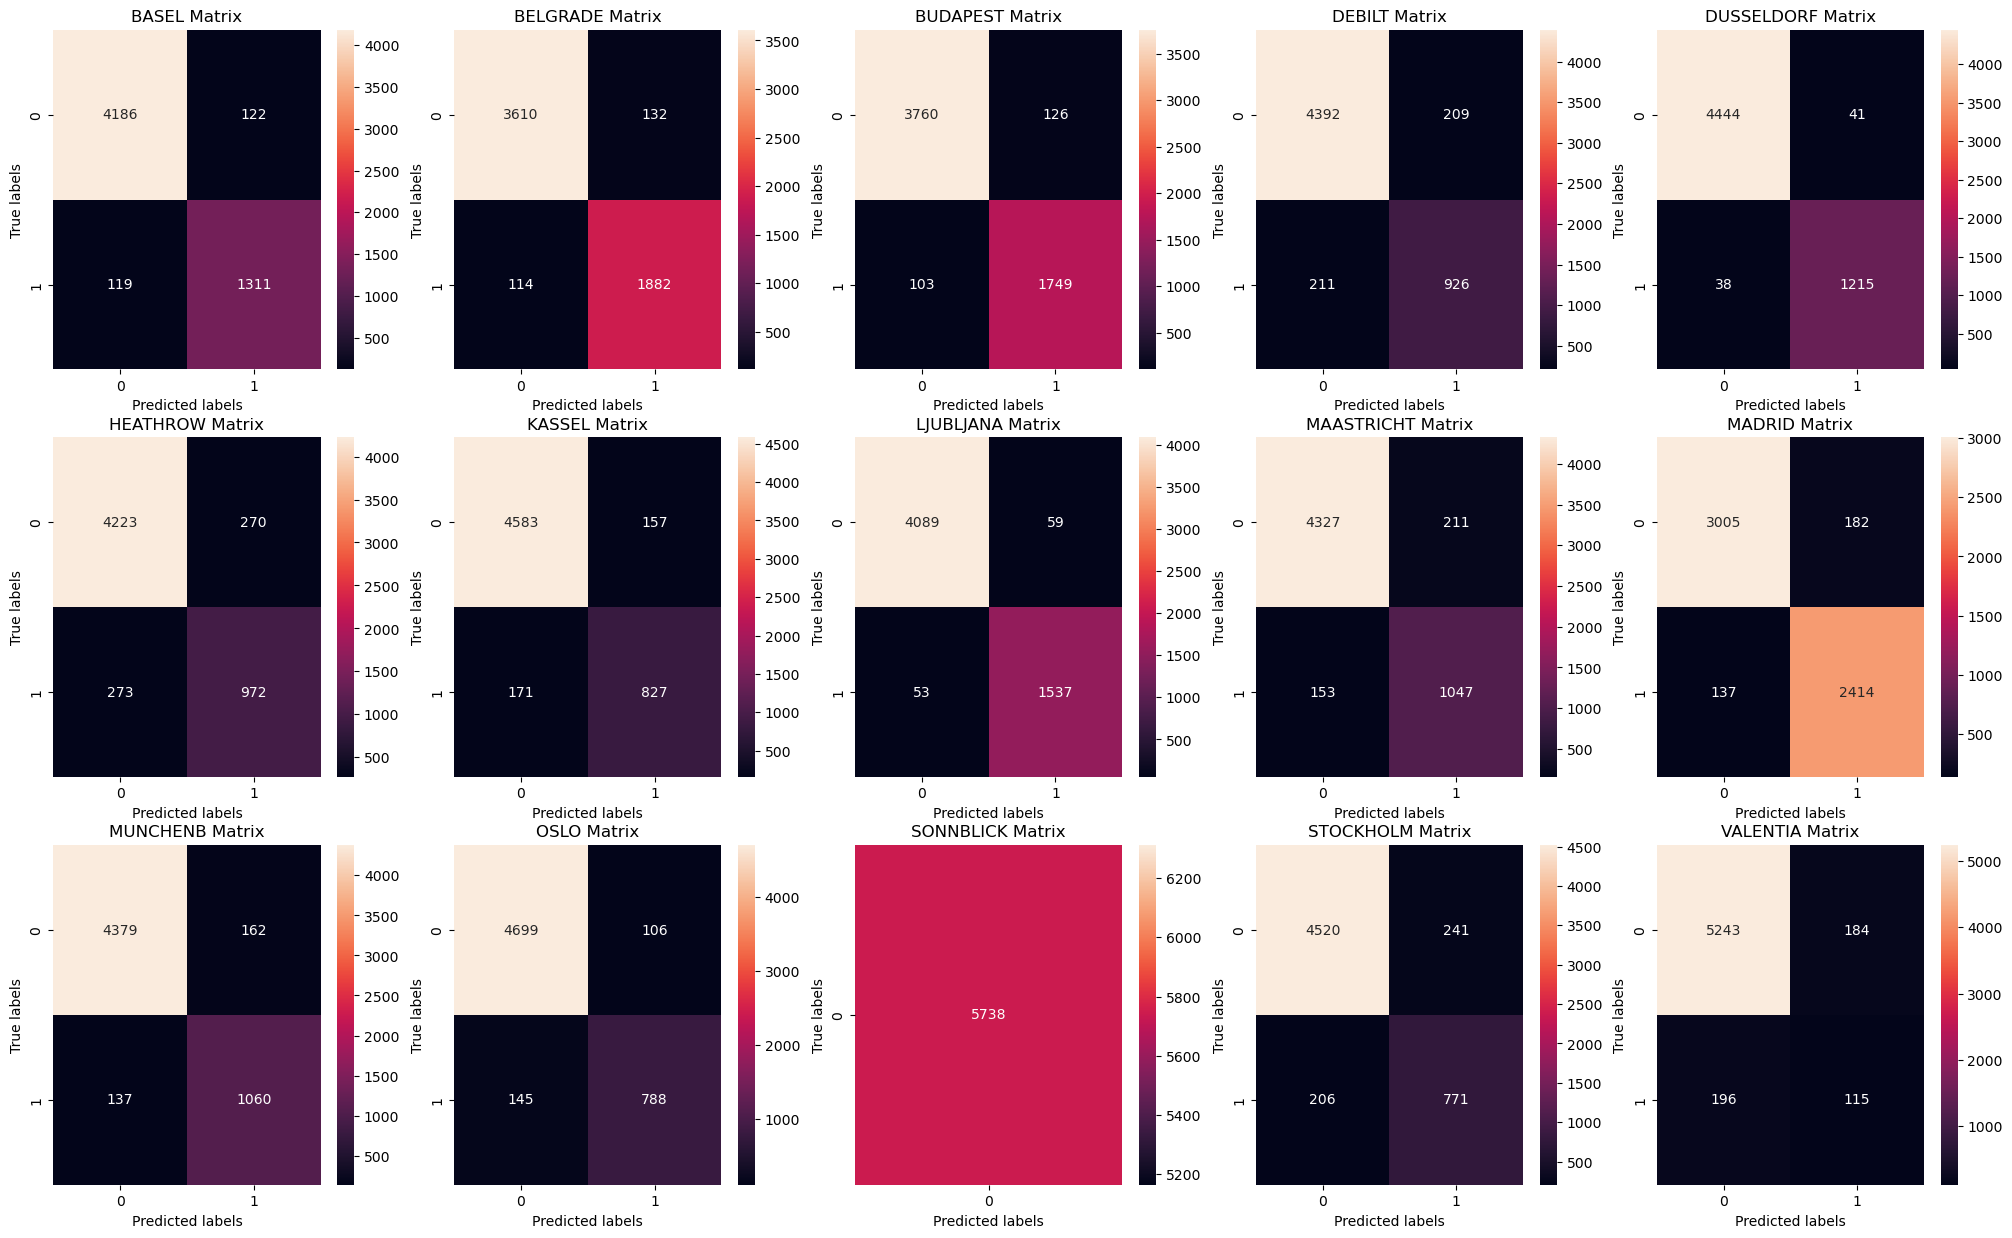

In [102]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        #accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1